

<font color='red'>**WARNING!**</font> <br>
 <font color='red'>**---------------------------------------------------------------------------------------------**</font> <br>
 <font color='red'>**DO NOT RUN THIS NOTEBOOK LOCALLY**</font> <br>
  <font color='lime'>**IT MUST BE RUN  USING  GOOGLE COLAB**</font> <a href="https://colab.research.google.com/github/deivid-01/Snakes-Classifier/blob/main/03_data_exploration_pre_processed_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> <br/>



This Notebook is part 3  of Deep Learning Project : [Snake Classifier](https://github.com/deivid-01/Snakes-Classifier) of the course [Fundamentos de Deep Learning](https://rramosp.github.io/2021.deeplearning/intro.html) <br>

 <font color='red'>**---------------------------------------------------------------------------------------------**</font> <br>

# Data exploration  - Pre-processed dataset

### About:

- This notebook is focus on explore pre-proccesed dataset  from [Snake Breeds](https://www.kaggle.com/deividt/snake-breeds) in order to check if data was correctly pre-processed and it's ready for train the model.
---
David Andrés Torres Betancour <br/>
Computer Engineering  Student <br/>
University of Antioquia <br/>
davida.torres@udea.edu.co <br/>
<a href="https://github.com/deivid-01" target="_parent"><img src="https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white" alt="Github"/></a>


## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files
import h5py
import random
import json
%matplotlib inline

## Tools

### Kaggle Tools

In [3]:
def loadCredentials():
  '''
  Description:
    Loads and configure kaggle.json file with credentials.

  Parameters:
      No parameters.

  Returns:
      No return.   
  ''' 
  print(bcolors.BOLD + "Upload kaggle.json file with credentials\n" + bcolors.ENDC)
  print(bcolors.WARNING + "IMPORTANT: Filename must be: kaggle.json\n" + bcolors.ENDC)
  uploaded_file=files.upload() #Upload file
  assert len(uploaded_file)>0,"Fetch canceled: Dataset not loaded"
  assert list(uploaded_file.keys())[0]=='kaggle.json', "Filename must be: kaggle.json"
 


  os.environ['KAGGLE_CONFIG_DIR'] = '/content' #Setup folder
  ! chmod 600 /content/kaggle.json  #Hide kaggle.json


def fetchDatasetFromKaggle(dataset_name, force_fetch=False):
  '''
  Description:
    fetchs dataset  from kaggle.

  Parameters:
      dataset_name: Dataset name
      force_fetch: Remove local data and download data
  Returns:
      No return.   
  '''
  if os.path.exists('kaggle.json') == False: 
    loadCredentials() 

  if force_fetch==True:
   process_info=! kaggle datasets download -d deividt/{dataset_name} --force #Download dataset
   if "100%" in list(process_info)[-1]:
       print(bcolors.OKGREEN + "Data from kaggle successfully fetch\n" + bcolors.ENDC)
       print(bcolors.BOLD + "Unzipping data..." + bcolors.ENDC)
       ! unzip \*.zip && rm *.zip
       print(bcolors.OKGREEN + "Data is ready in your local folder!\n" + bcolors.ENDC)
   elif "404 - Not Found" in list(process_info)[0]: 
       print(bcolors.FAIL + "404 - Dataset  Not Found in 'deividt' Account\n" + bcolors.ENDC)
   else:
       assert False,list(process_info)[-1]


  else:
   process_info =  ! kaggle datasets download -d deividt/{dataset_name} 
   if "Skipping" in list(process_info)[0]:
       print(bcolors.WARNING + "Data already exists locally\nIf you want force fetch set force_fetch parameter to True" + bcolors.ENDC)
  
   elif "100%" in list(process_info)[-1]:
       print(bcolors.OKGREEN + "Data from kaggle successfully fetch\n" + bcolors.ENDC)
       print(bcolors.BOLD + "Unzipping data... \n" + bcolors.ENDC)
       ! unzip \*.zip && rm *.zip #Unzip downloaded file and delete zip
       print(bcolors.OKGREEN + "Data is ready in your local folder!\n" + bcolors.ENDC)
   elif "404 - Not Found" in list(process_info)[0]: 
       print(bcolors.FAIL + "404 - Dataset  Not Found in 'deividt' Account\n" + bcolors.ENDC)
   else:
       assert 1==2,list(process_info)[-1]

### Exploration Tools

In [4]:
class bcolors:
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'

def missingValues(dataF):
  '''
  Description:
    Find missing values in dataframe.

  Parameters:
      dataF: DataFrame.

  Returns:
      list with  missing values.   
  '''
  k = dataF.isna().sum()
  miss_values = k[k!=0]
  if miss_values.size>0:
    return (miss_values)
  return ("No missing values")



def decode_breedID(idx):
  '''
  Description:
    Decode breed code Id

  Parameters:
      idx: Breed code

  Returns:
      Breed name.   
  '''
  df_decode = pd.read_csv('decode_breed.csv')
  breed_encode = df_decode['breed_encode']
  return df_decode.loc[breed_encode == idx]['breed'].tolist()[0]

def getRandomGroup(max_groups=1):
  '''
  Description:
    Get random group ( .h5 File).

  Parameters:
      max_groups: Total groups.

  Returns:
      x: Numpy array | data.
      y: Numpy array | labels   
  '''
  group_num =str(random.randint(1,max_groups))
  destination_filepath ='group_'+group_num+'.h5'
  with h5py.File(destination_filepath, "r") as f:
      
      print(bcolors.BOLD + f"Reading group {group_num}..." + bcolors.ENDC)

      x = f["input_data"][:]
      x = x.reshape(x.shape[0],224,224,3)

      y = f["input_labels"][:]

      print(bcolors.OKGREEN + "Data readed\n" + bcolors.ENDC)


      print("Keys: ",list(f.keys()))
      print('x shape =', x.shape, '| y shape =', y.shape)
      
      
      
      return x,y,group_num
#Printing ------------------------------------------------------------------------
def showGroupDetailedInfo(group_num,y):
  '''
  Description:
    Plot breed count for selected group

  Parameters:
      group_num: Number group .
      y: Numpy Array: Labels

  Returns:
      reverse(str1):The string which gets reversed.   
  ''' 

  unique_values = np.unique(y)

  snake_names=[]
  snake_count=[]
  for value in unique_values:
    snake_name=value#decode_breedID(value)
    snake_names.append( value )
    snake_count.append(len(y[y==value]))
   
   #Plotting bar chart
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])
  ax.bar(snake_names,snake_count)
  ax.set_ylabel('Count')
  ax.set_xlabel('Breed code')
  ax.set_title('Group '+group_num+' Breeds count')
  plt.show()


def showRandomImage(x,y): 
  '''
  Description:
    Select random image of selected group.

  Parameters:
      x: Numpy Array | data.
      y: Numpy Array | labels

  Returns:
      none.   
  '''
  index = random.randint(0,x.shape[0])
  image = x[index]
  plt.imshow(image)
  print("Img shape:",image.shape)
  #print('breed:', decode_breedID(y[index]))
  print('breed:', (y[index]))


def show_labeled_image_mosaic(imgs, labels, figsize=(20, 20), idxs=None):
  '''
  Description:
    Plot labeled image mosic of selected breeds.

    @Author: Raul Ramos Pollan

  Parameters:
      imgs: Numpy Arrray
      labels: Numpy array
      figzize: Tuple | Figure size

  Returns:
      None.   
  '''

  plt.figure(figsize=figsize)
  for labi,lab in [i for i in enumerate(np.unique(labels))]:
      k = imgs[labels == lab]
      _idxs = idxs[:5] if idxs is not None else np.random.permutation(len(k))[:5]
      for i, idx in enumerate(_idxs):
          if i == 0:
              plt.subplot(10, 11, labi*11+1)
              plt.title("LABEL %d" % lab)
              plt.plot(0, 0)
              plt.axis("off")

          img = k[idx]
          plt.subplot(10, 11, labi*11+i+2)
          plt.imshow(img, cmap=plt.cm.Greys_r)
          plt.axis("off")

## Loading data

- Downloading pre-proccessed dataset [snake-breeds](https://www.kaggle.com/deividt/snake-breeds) from Kaggle. <br>

 - In order to use the Kaggle’s public API, you must first authenticate using an API token. For that follow the next steps: <br/> <br/>
     1. Go to https://www.kaggle.com/
     2. Click on your user profile picture
     3. Then on "Account" from the dropdown menu. This will take you yo your account settings
     4. Scroll down to the section of the page labelled API
     5. To create a new token, click on the “Create New API Token” button. This will download a fresh authentication token onto your machine named "kaggle.json"
     6.  <font color='red'>**YOU MUST UPLOAD kaggle.json FILE in the ROOT FOLDER**</font> 

<font color='red'>Fetching data and unzipping files can take several minutes ( at least 30 min)  </font> 

In [ ]:
fetchDatasetFromKaggle( dataset_name = "snake-breeds")

Upload kaggle.json file with credentials

IMPORTANT: Filename must be: kaggle.json



Saving kaggle.json to kaggle.json
Data from kaggle successfully fetch

Unzipping data... 

Archive:  snake-breeds.zip
  inflating: group_1.h5              
  inflating: group_10.h5             
  inflating: group_11.h5             
  inflating: group_12.h5             
  inflating: group_13.h5             
  inflating: group_14.h5             
  inflating: group_15.h5             
  inflating: group_16.h5             
  inflating: group_17.h5             
  inflating: group_18.h5             
  inflating: group_19.h5             
  inflating: group_2.h5              
  inflating: group_20.h5             
  inflating: group_21.h5             
  inflating: group_22.h5             
  inflating: group_23.h5             
  inflating: group_24.h5             
  inflating: group_25.h5             
  inflating: group_26.h5             
  inflating: group_27.h5             
  inflating: group_28.h5             
  inflating: group_29.h5             
  inflating: group_3.h5              
  inflat

- Reading main .csv file

In [ ]:
df = pd.read_csv('pre_proccessed_data.csv')

##Data exploration

- First  samples

In [ ]:
df.head(5)

,Unnamed: 0,image_path,breed,breed_encode
0,14,data/2925c677825448a7935fad227c1fa9b2.jpg,Thamnophis sirtalis,9.0
1,31,data/f8759167b4dd4776bcce0da51c56dfe6.jpg,Thamnophis sirtalis,9.0
2,33,data/f03dfbd116ec477cba261fdb10896284.jpg,Thamnophis sirtalis,9.0
3,52,data/a6fa7bfd9c7f4daaaf98a00e044007f8.jpg,Thamnophis sirtalis,9.0
4,54,data/dabe31dca5054d9684ec947ccc7984d5.jpg,Thamnophis sirtalis,9.0


- Last samples

In [ ]:
df.tail(5)

,Unnamed: 0,image_path,breed,breed_encode
73995,218656,data/f17f2abb03d7457eadf52d6a0dc31ec6.jpg,Pantherophis obsoletus,6.0
73996,218690,data/a15637e800344da18f7f295c1e7dd530.jpg,Pantherophis obsoletus,6.0
73997,218764,data/5a8031f653754bc383d8aa5ee7282a5c.jpg,Pantherophis obsoletus,6.0
73998,218765,data/635b72fb17804b98997010eb6df0e721.jpg,Pantherophis obsoletus,6.0
73999,218774,data/c7f0f50754fd4f00b4dde1026f0f4589.jpg,Pantherophis obsoletus,6.0


- Missing values in columns

In [ ]:
missingValues(df)

'No missing values'

- Data types

In [ ]:
for c in df.columns:
    print ("%20s"%c, df[c].dtype)

          Unnamed: 0 int64
          image_path object
               breed object
        breed_encode float64


- Data Size

In [ ]:
df.shape

(74000, 4)

- Breeds:

In [ ]:
print(pd.unique(df['breed']));

['Thamnophis sirtalis' 'Pituophis catenifer' 'Storeria dekayi'
 'Nerodia erythrogaster' 'Diadophis punctatus' 'Crotalus atrox'
 'Pantherophis alleghaniensis' 'Nerodia sipedon' 'Agkistrodon contortrix'
 'Pantherophis obsoletus']


- Total breeds:

In [ ]:
len ( pd.unique(df['breed']))

10

- Total images for each breed : 

In [ ]:
df['breed'].value_counts()

Diadophis punctatus            7400
Agkistrodon contortrix         7400
Nerodia sipedon                7400
Pantherophis alleghaniensis    7400
Pituophis catenifer            7400
Pantherophis obsoletus         7400
Thamnophis sirtalis            7400
Nerodia erythrogaster          7400
Crotalus atrox                 7400
Storeria dekayi                7400
Name: breed, dtype: int64

- Data density:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


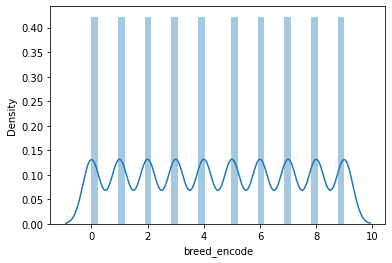

In [ ]:
sns.distplot(df['breed_encode']);

###Visualizating images from .h5 Files

- Reading random group (.h5 file):

In [ ]:
total_breeds = len ( pd.unique(df['breed']))
x,y,groupNum =getRandomGroup( max_groups= total_breeds )

Reading group 4...
Data readed

Keys:  ['input_data', 'input_labels']
x shape = (2000, 224, 224, 3) | y shape = (2000,)


- Breeds count

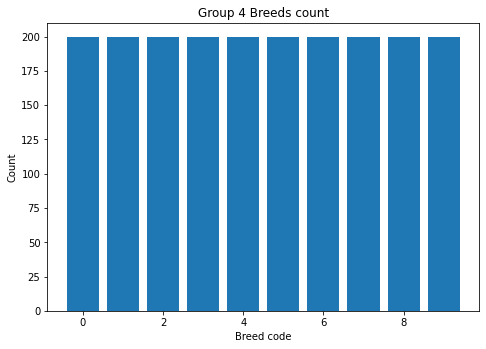

In [ ]:
showGroupDetailedInfo(groupNum,y)

- Random images from each breed:

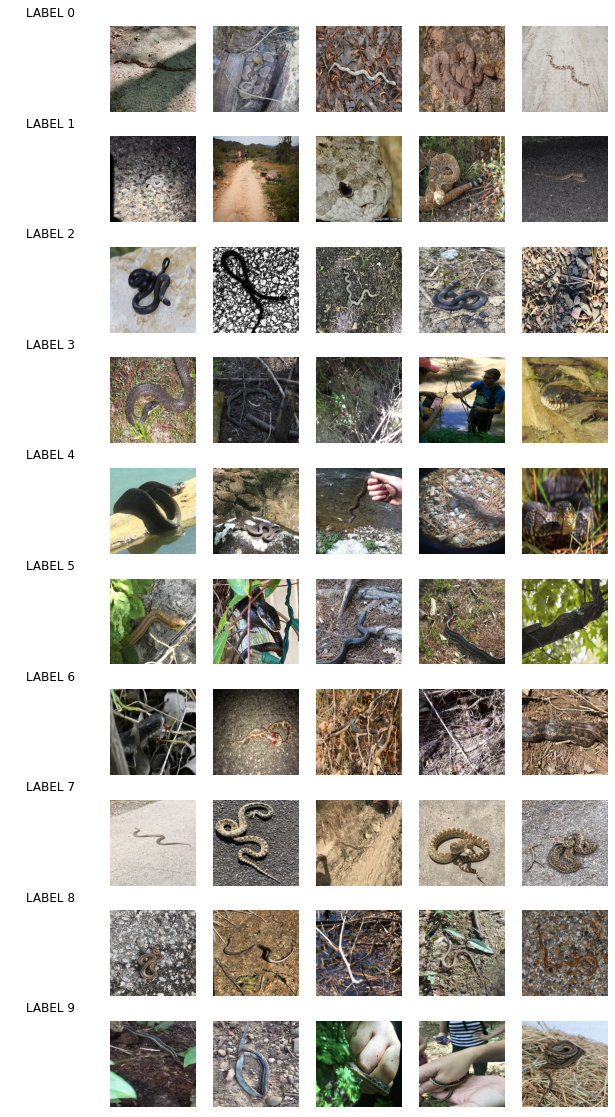

In [ ]:
 show_labeled_image_mosaic(x,y)